In [7]:
from qiskit import *

# Behind the Scenes

When the user select a weapon, we iterate through the gates $H, X, Y, Z$ and modifying a quantum circuit. This is done in `BulletManager`. The experiment is done a set number of shots, and the probability of being a 0 or a 1 is mapped to the y-coordiante of the bullet.

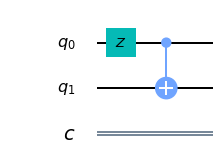

In [8]:
circ = QuantumCircuit(2, 1)

gates = ['Z']

for g in gates:
    if g == 'H':
        circ.h(0)
    if g == 'X':
        circ.x(0)
    if g == 'Y':
        circ.y(0)
    if g == 'Z':
        circ.z(0)
    circ.cx(0, 1)
circ.draw(output='mpl')

Additionally, the user has an option of selecting one which basis to measure. Example of measuring in $|+\rangle$ and $|-\rangle$ basis:

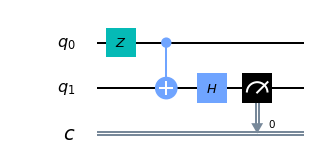

In [9]:
circ.h(1)
circ.measure(1,0)
circ.draw(output='mpl')

## Error Correcting

Once the user finishes the first level, the second level encodes logical qubits using `[4,2,2]` stabalizer code [2]

This gives us a mapping between logical qubits and physical qubits:
$$|00\rangle = \frac{1}{\sqrt{2}} (|0000\rangle + | |1111\rangle)$$
$$|01\rangle = \frac{1}{\sqrt{2}} (|0011\rangle + | |1100\rangle)$$
$$|10\rangle = \frac{1}{\sqrt{2}} (|0101\rangle + | |1010\rangle)$$
$$|11\rangle = \frac{1}{\sqrt{2}} (|0110\rangle + | |1001\rangle)$$

In the circuit we prepare the $|00\rangle$ logical state, with an ancilla qubit that will notify of error. Afterwards we apply error-correcting operations [1].

After running a number of shots, we ignore all output where the ancilla is a $1$, and remove all states that are outside the code space. The remaing states are renormalized and mapped to logical qubits. Similar to the non-error correcting version, the probability of 0 or 1 are mapped to y-coordinates.

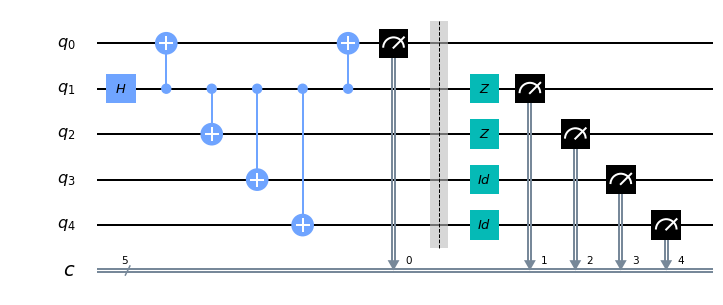

In [10]:
ancilla1 = 0
# Index of qubit
qub = 1
circ = QuantumCircuit(5, 5)

# Initial logical |00> state preperation
circ.h(qub)
circ.cx(qub, ancilla1)
for q in range(1, 4):
    circ.cx(qub, qub + q)
circ.cx(qub, ancilla1)
circ.measure(ancilla1, ancilla1)
circ.barrier()

for g in gates:
    if g == 'X':
        circ.x(qub)
        circ.iden(qub+1)
        circ.x(qub+2)
        circ.iden(qub+3)
    if g == 'Z':
        circ.z(qub)
        circ.z(qub+1)
        circ.iden(qub+2)
        circ.iden(qub+3)
    if g == 'H':
        for q in range(0, 4):
            circ.h(qub+q)

for q in range(0, 4):
    circ.measure(qub + q, qub + q)
circ.draw(output='mpl')

# References
```
[1]R. Chao and B. W. Reichardt, “Fault-tolerant quantum computation with few qubits,” npj Quantum Inf, vol. 4, no. 1, p. 42, Dec. 2018.

[2]M. Urbanek, B. Nachman, and W. A. de Jong, “Quantum error detection improves accuracy of chemical calculations on a quantum computer,” arXiv:1910.00129 [physics, physics:quant-ph], Sep. 2019.
```